# P02: Probability

## Problem 1: The Gaussian distribution

Let us assume, we measure two quantities $y_1, y_2$ at locations $x_1, x_2$. We know that our observations are independent and each follows a Gaussian distribution with means $\mu_1, \mu_2$ and standard deviations $\sigma_1, \sigma_2$, i.e. $$P(y_1)=\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}},$$ and $$P(y_2)=\frac{1}{\sqrt{2\pi}\sigma_2}e^{-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}.$$ We have that $\mu_1=0, \mu_2=2, \sigma_1=0.5, \sigma_2=2$, and the setup is illustrated in the plot below.

(i) What is the joint distribution $P(y_1, y_2)$ of $y_1, y_2$? Write down its analytical form.

(ii) Use `numpy` to draw $n$ samples of $y^i_1, y^i_2$ from this distribution. You can start with $n=100$ and see what happens if you increase $n$.

(iii) Use `matplotlib` to plot histograms of the samples. In particular, plot both the 2D histogram for $y_1, y_2$, as well as the two 1D histograms for $y_1$ and $y_2$.

(iv) Use `matplotlib` to obtain a contour plot from the 2D samples. Overplot it on your 2D historgram and compare.

(v) Derive an analytic expectation for the 1D histograms of $y_1$ and $y_2$ (what distribution are you plotting in this case?). Compare to your findings above. 

(vi) Let us now assume that we are actually not interested in $y_1, y_2$ but in a linear transformation of these variables, $z_1, z_2$ defined as $$\boldsymbol{z}=A\boldsymbol{y},$$ where $$A=\begin{pmatrix}
1 & 0.2  \\
0.2 & 1 
\end{pmatrix}.$$ Using these new samples, repeat problems (i) to (v). What has changed compared to before? 

**Hint:** For (v) you can use the analytic expression for the 2D Gaussian we have discussed in class, i.e. $$\mathcal{N}(\boldsymbol{y}) = \frac{1}{\sqrt{(2\pi)^2|C|}}e^{-\frac{1}{2}(\boldsymbol{y}-\boldsymbol{\mu})^TC^{-1}(\boldsymbol{y}-\boldsymbol{\mu})},$$ with $$C = \begin{pmatrix}
\sigma^2_1 & r\sigma_1\sigma_2  \\
r\sigma_1\sigma_2 & \sigma^2_2 
\end{pmatrix}.$$

## Answer from here:

### (i)Joint distribution:
$$
P(y_{1},y_{2})=\frac{2}{\sqrt{ 2 }\pi \sigma_{1}}\exp\left( -\frac{(y_{1}-\mu_{1})^{2}}{2\sigma_{1}^{2}} \right)\cdot \frac{1}{\sqrt{ 2 }\pi\sigma_{2}}\exp(-\frac{(y_{2}-\mu_{2})^{2}}{2\sigma_{2}^{2}})
$$

In [9]:
#(ii)

import numpy as np

# Parameters
n = 1000  # Number of samples
mu1, sigma1 = 0, 0.5  # Mean and standard deviation for y1
mu2, sigma2 = 2, 2    # Mean and standard deviation for y2

# Draw samples
y1_samples = np.random.normal(mu1, sigma1, n)
y2_samples = np.random.normal(mu2, sigma2, n)


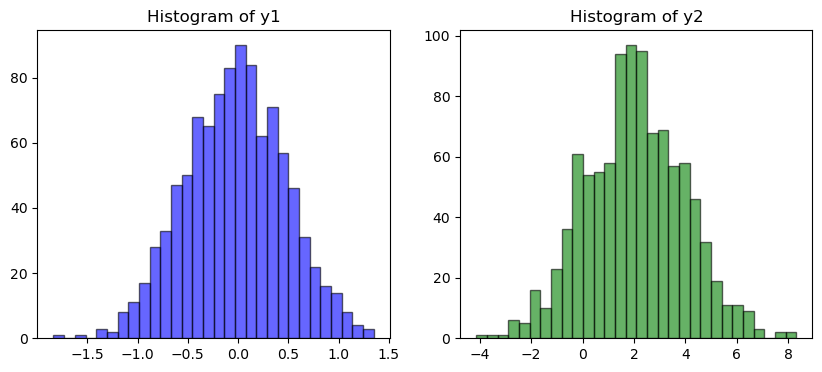

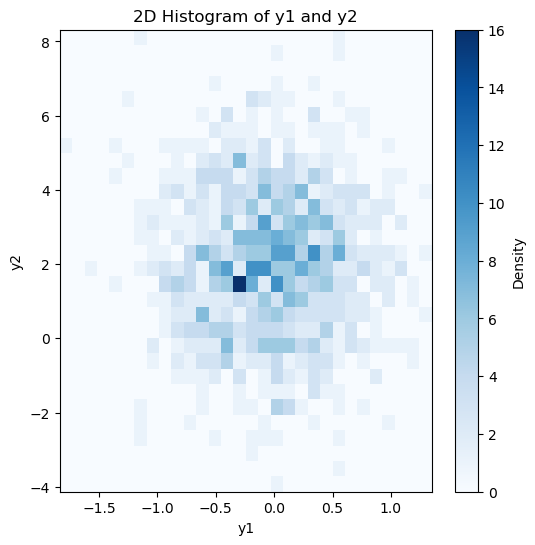

In [13]:
#(iii)
import matplotlib.pyplot as plt

# 1D histograms
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y1_samples, bins=30, alpha=0.6, color='blue', edgecolor='black')
plt.title('Histogram of y1')

plt.subplot(1, 2, 2)
plt.hist(y2_samples, bins=30, alpha=0.6, color='green', edgecolor='black')
plt.title('Histogram of y2')

plt.show()

# 2D histogram
plt.figure(figsize=(6, 6))
plt.hist2d(y1_samples, y2_samples, bins=30, cmap='Blues')
plt.colorbar(label='Density')
plt.title('2D Histogram of y1 and y2')
plt.xlabel('y1')
plt.ylabel('y2')
plt.show()


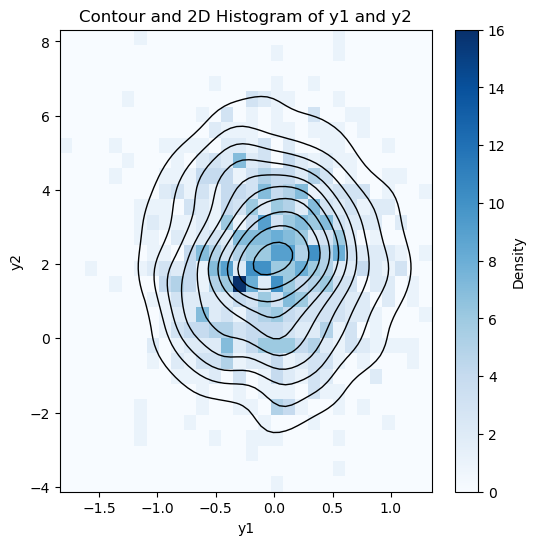

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate the 2D grid
x = np.linspace(y1_samples.min() - 1, y1_samples.max() + 1, 100)
y = np.linspace(y2_samples.min() - 1, y2_samples.max() + 1, 100)
X, Y = np.meshgrid(x, y)

# Create a density estimate using the sample points
xy = np.vstack([y1_samples, y2_samples])
density = gaussian_kde(xy)

# Evaluate the density on the grid
Z = density(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create the 2D histogram
plt.figure(figsize=(6, 6))
plt.hist2d(y1_samples, y2_samples, bins=30, cmap='Blues')
plt.colorbar(label='Density')

# Create the contour plot
plt.contour(X, Y, Z, levels=10, linewidths=1, colors='black')
plt.title('Contour and 2D Histogram of y1 and y2')
plt.xlabel('y1')
plt.ylabel('y2')
plt.show()



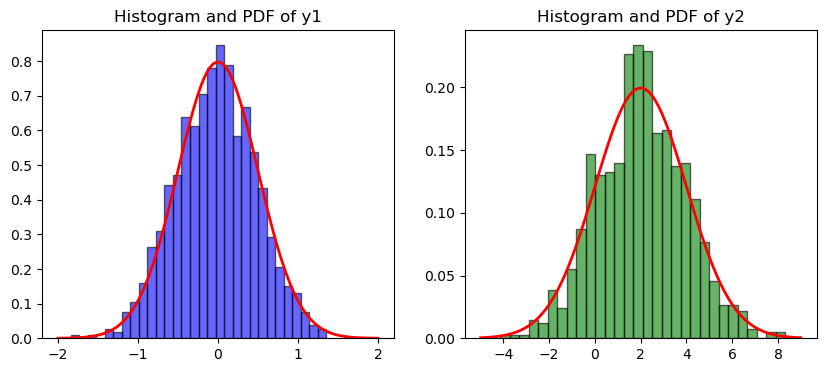

In [16]:
#(v)
from scipy.stats import norm

# Generate points for the expected PDF
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-5, 9, 100)

# Compute the PDF
pdf_y1 = norm.pdf(x1, mu1, sigma1)
pdf_y2 = norm.pdf(x2, mu2, sigma2)

# Plot histograms and overplot the PDF
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y1_samples, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.plot(x1, pdf_y1, color='red', lw=2)
plt.title('Histogram and PDF of y1')

plt.subplot(1, 2, 2)
plt.hist(y2_samples, bins=30, density=True, alpha=0.6, color='green', edgecolor='black')
plt.plot(x2, pdf_y2, color='red', lw=2)
plt.title('Histogram and PDF of y2')

plt.show()


Text(0, 0.5, '$y$')

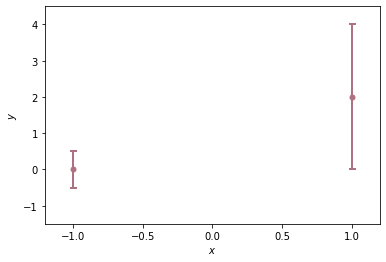

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([-1, 1])
mu = np.array([0, 2])
sigma  = np.array([0.5, 2])

plt.errorbar(x, mu, yerr=sigma, marker='.', linewidth=2, markersize=10, \
            elinewidth=2, capthick=2, capsize=3.5, linestyle='None', color='#AE7182')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.5, 4.5)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

## Problem 2: The Monty Hall problem (taken from MacKay)

On a game show, a contestant is told the rules as follows:

There are three doors, labeled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the gameshow host will open one of the other two doors, and he will do so in such a way as not to reveal the prize. For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.

At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.
Imagine that the contestant chooses door 1 first; then the gameshow host opens door 3, revealing nothing behind the door, as promised. 

Should the contestant 

(i) stick with door 1, 

(ii) switch to door 2, 

(ii) or does it make no difference?

Explain your solution and reasoning.

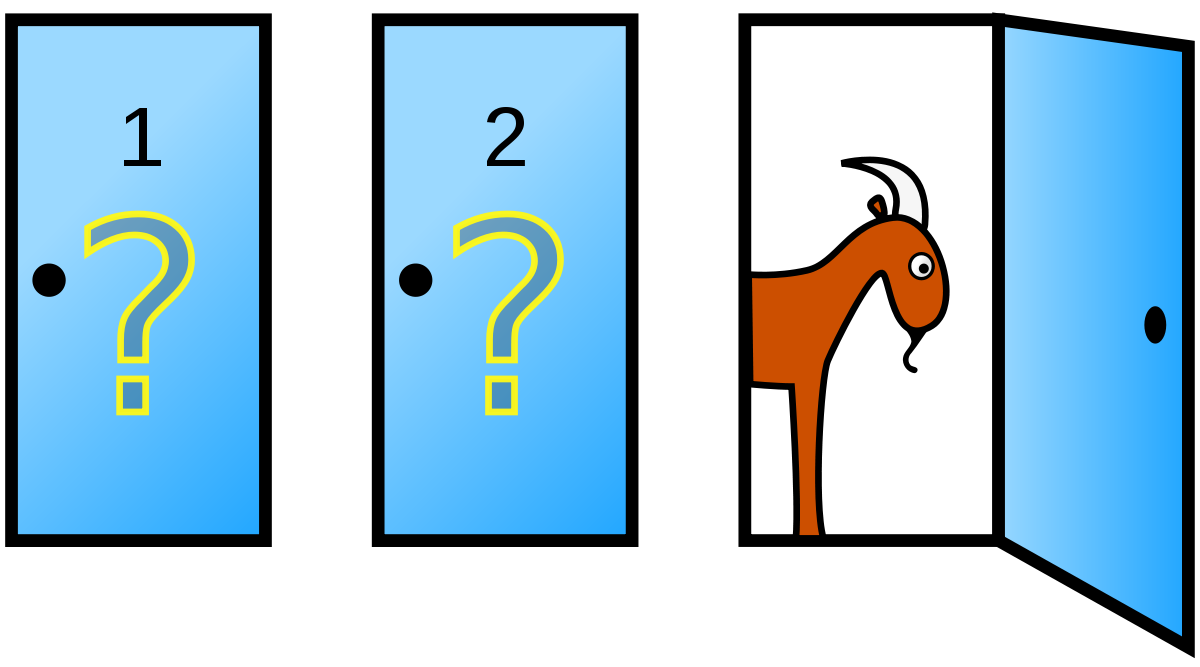